In [ ]:
import pickle
import numpy as np
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import joblib
from sklearn import linear_model
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

scorer = make_scorer(mean_squared_error, greater_is_better=False)

def calculate_rrmse(model, x_test, y_test, y_train):
    preds = model.predict(x_test).ravel()
    y_bar_train = np.mean(y_train)
    naive_sse = sum((y_bar_train - y_test) ** 2)
    model_sse = sum((preds - y_test) ** 2)
    rrmse = 100 * np.sqrt(model_sse / naive_sse)
    return rrmse

def get_results(model):
    print(calculate_rrmse(model, X_train.tocsr(), y_train, y_train))
    print(calculate_rrmse(model, X_val.tocsr(), y_val, y_train))
    print(calculate_rrmse(model, X_test.tocsr(), y_test, y_train))
    return

/root/venv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
with open('SG_x_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('SG_y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('SG_x_val.pkl', 'rb') as f:
    X_val = pickle.load(f)

with open('SG_y_val.pkl', 'rb') as f:
    y_val = pickle.load(f)

with open('SG_x_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('SG_y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# with open('feat_dict.pkl', 'rb') as f:
#     feat_dict = pickle.load(f)

# with open('percent_dict.pkl', 'rb') as f:
#     percent_dict = pickle.load(f)

# reversed_feat_dict = {v: k for k, v in feat_dict.items()}

In [ ]:
with open('NY_x_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('NY_y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('NY_x_val.pkl', 'rb') as f:
    X_val = pickle.load(f)

with open('NY_y_val.pkl', 'rb') as f:
    y_val = pickle.load(f)

with open('NY_x_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('NY_y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Multilayer Perceptron (MLP)

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 497.6 MB 5.7 kB/s 
     |████████████████████████████████| 126 kB 49.5 MB/s 
     |████████████████████████████████| 5.8 MB 8.7 MB/s 
     |████████████████████████████████| 81 kB 15.2 MB/s 
     |████████████████████████████████| 14.5 MB 43.1 MB/s 
     |████████████████████████████████| 42 kB 2.6 MB/s 
     |████████████████████████████████| 4.5 MB 32.5 MB/s 
     |████████████████████████████████| 65 kB 6.5 MB/s 
     |████████████████████████████████| 57 kB 5.1 MB/s 
     |████████████████████████████████| 2.1 MB 9.7 MB/s 
     |████████████████████████████████| 462 kB 14.9 MB/s 
     |████████████████████████████████| 781 kB 26.8 MB/s 
     |████████████████████████████████| 289 kB 25.6 MB/s 
     |████████████████████████████████| 4.9 MB 4.6 MB/s 
     |████████████████████████████████| 97 kB 9.7 MB/s 
     |████████████████████████████████| 151 kB 54.1 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import tensorflow as tf
from random import shuffle
import math
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
cp = ModelCheckpoint('mlpcurr.h5', monitor='val_loss', 
mode = 'min', save_best_only = True)
es = EarlyStopping(monitor='val_loss', patience=10, mode = 'min')

In [ ]:
class SparseSequence(tf.keras.utils.Sequence):
    def __init__(self, x_vals, y_vals, batch_size):
        self.x_vals = x_vals
        self.y_vals = y_vals
        self.inds = list(range(x_vals.shape[0]))
        shuffle(self.inds)
        self.batch_size = batch_size
    def __getitem__(self, item):
        from_ind = self.batch_size * item
        to_ind = self.batch_size * (item + 1)
        return self.x_vals[self.inds[from_ind:to_ind], :].todense(), np.array(self.y_vals)[self.inds[from_ind:to_ind]]
    def on_epoch_end(self):
        shuffle(self.inds)
    def __len__(self):
        return math.ceil(self.x_vals.shape[0] / self.batch_size)

In [ ]:
history = model.fit(SparseSequence(X_train.tocsr(), y_train, 32), epochs=1000,
          validation_data=(SparseSequence(X_val.tocsr(), y_val, 32)), callbacks=[es, cp], 
          verbose = 1)

Epoch 1/1000
68/68 [==============================] - 1s 9ms/step - loss: 0.6765 - val_loss: 0.3602
Epoch 2/1000
68/68 [==============================] - 0s 7ms/step - loss: 0.4380 - val_loss: 0.3277
Epoch 3/1000
68/68 [==============================] - 0s 6ms/step - loss: 0.3626 - val_loss: 0.2759
Epoch 4/1000
68/68 [==============================] - 0s 6ms/step - loss: 0.3091 - val_loss: 0.2689
Epoch 5/1000
68/68 [==============================] - 0s 6ms/step - loss: 0.2609 - val_loss: 0.2737
Epoch 6/1000
68/68 [==============================] - 0s 5ms/step - loss: 0.2355 - val_loss: 0.2965
Epoch 7/1000
68/68 [==============================] - 0s 6ms/step - loss: 0.1926 - val_loss: 0.6391
Epoch 8/1000
68/68 [==============================] - 0s 6ms/step - loss: 0.1740 - val_loss: 0.7953
Epoch 9/1000
68/68 [==============================] - 0s 5ms/step - loss: 0.1731 - val_loss: 1.1639
Epoch 10/1000
68/68 [==============================] - 0s 5ms/step - loss: 0.1409 - val_loss: 1.3984

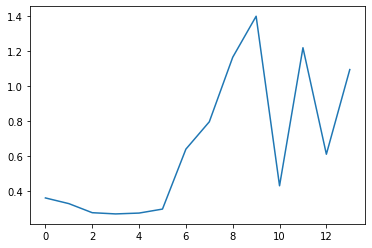

In [ ]:
plt.plot(history.history['val_loss'])

In [ ]:
from keras.models import load_model

model = load_model('mlpcurr.h5')

In [ ]:
model.evaluate(SparseSequence(X_val.tocsr(), y_val, 32))

15/15 [==============================] - 0s 2ms/step - loss: 0.2689


0.2688947319984436

In [ ]:
def calculate_rrmse(model, x_test, y_test, y_train):
    preds = model.predict(x_test).ravel()
    y_bar_train = np.mean(y_train)
    naive_sse = sum((y_bar_train - y_test) ** 2)
    model_sse = sum((preds - y_test) ** 2)
    rrmse = 100 * np.sqrt(model_sse / naive_sse)
    return rrmse

In [ ]:
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

In [ ]:
print(calculate_rrmse(model, convert_sparse_matrix_to_sparse_tensor(X_train.tocsr()), y_train, y_train))
print(calculate_rrmse(model, convert_sparse_matrix_to_sparse_tensor(X_val.tocsr()), y_val, y_train))
print(calculate_rrmse(model, convert_sparse_matrix_to_sparse_tensor(X_test.tocsr()), y_test, y_train))

47.09996798496231
52.51265534661115
56.32766682050849


In [ ]:
X = X_train
y = y_train
idxs = list(range(X.shape[0]))
shuffle(idxs)
pred = model.predict(SparseSequence(X.tocsr()[idxs[0]:idxs[0]+1], y[idxs[0]:idxs[0]+1], 1))[0][0]
y_mean = 159.63618651772958
y_sd = 282.11837343969637
pred = pred * y_sd + y_mean
actual = y[idxs[0]:idxs[0]+1].values[0]
actual = actual * y_sd + y_mean
print("Predicted: " + str(pred))
print("Actual: " + str(actual))

Predicted: 31.41874443925539
Actual: 32.0


## Feature Importance (based on Permutation Importance)

In [ ]:
from scipy.sparse import csr_matrix
from keras.models import load_model

def shuffle_feature(idx, x):
    X_t = csr_matrix.transpose(x.tocsr())
    row = X_t[idx,].toarray()[0]
    shuffle(row)
    row = csr_matrix(row)
    X_t[idx, ] = row
    X_t = csr_matrix.transpose(X_t.tocsr())
    return X_t

def get_percent(model, x_val, y_val, y_train): #57.21454207110662 or 56.94156047649292
    curr_val = calculate_rrmse(model, x_val.tocsr(), y_val, y_train)
    percent = (curr_val - 56.94156047649292) / 56.94156047649292 * 100
    return percent

In [ ]:
features = np.array(range(X_train.shape[1]))
# shuffle(features)
percent_dict = {}
model = load_model('mlp.h5')
for i in features:
    curr = feat_dict[i]
    x_val = shuffle_feature(i, X_val)
    percent = get_percent(model, x_val, y_val, y_train)
    percent_dict[curr] = percent
    print(f'Percent for {curr}: {percent}')

Percent for Categorical amenities_str fridgerdaire stainless steel gas stove: 3.4834681155920184
Percent for Categorical amenities_str fridgidaire refrigerator: 3.4834681155920184
Percent for Categorical amenities_str fridgidaire stainless steel gas stove: 3.4834681155920184
Percent for Categorical amenities_str fridgidaire stainless steel oven: 3.4834681155920184
Percent for Categorical amenities_str fridgidale refrigerator: 3.4834681155920184
Percent for Categorical amenities_str fridgidare stainless steel gas stove: 3.4834681155920184
Percent for Categorical amenities_str fridgidare stainless steel oven: 3.4834681155920184
Percent for Categorical amenities_str friedrich conditioner: 3.4834681155920184
Percent for Categorical amenities_str friedrick conditioner: 3.4834681155920184
Percent for Categorical amenities_str frigedare stainless steel oven: 3.4834681155920184
Percent for Categorical amenities_str frigid aire refrigerator: 3.4834681155920184
Percent for Categorical amenities_

In [ ]:
with open('percent_dict.pkl', 'wb') as f:
    pickle.dump(percent_dict, f)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

percents = list(percent_dict.items())
# percents = list(map(lambda x: (feat_dict[x[0]], x[1]), percents)) #temporary mapping

percents.sort(key = lambda x: x[1], reverse = True)

vals = np.array(list(map(lambda x: x[1], percents)))
std = np.std(vals)
mean = np.mean(vals)

percents = np.array(percents)
top = pd.DataFrame(percents, columns = ('Feature', 'Strength'))
top.Strength = top.Strength.astype(float)
top

,Feature,Strength
0,Numerical accommodates,18.026285
1,Numerical bedrooms,11.131669
2,Categorical room_type private room,7.828920
3,Numerical minimum_nights,7.798354
4,Numerical longitude,7.466581
...,...,...
6755,Categorical property_type entire rental unit,3.324560
6756,Categorical amenities_str single level home,3.312041
6757,Categorical property_type private room in serv...,3.285112
6758,Categorical amenities_str bed linen,3.271207


In [ ]:
print(pd.Series(vals).describe())

count    6760.000000
mean        3.495552
std         0.226443
min         3.200242
25%         3.482530
50%         3.483468
75%         3.486342
max        18.026285
dtype: float64


In [ ]:
reversed_feat_dict = {v: k for k, v in feat_dict.items()}
rem_features_idxs = []
for i in percents:
    if float(i[1]) >= 4:
        rem_features_idxs.append(reversed_feat_dict[i[0]])

NameError: name 'percents' is not defined

In [ ]:
X_train = csr_matrix(X_train.tocsr()[:,rem_features_idxs])
X_val = csr_matrix(X_val.tocsr()[:,rem_features_idxs])
X_test = csr_matrix(X_test.tocsr()[:,rem_features_idxs])

## Testing Hypothesis

Superhost: val rrmse increase by 0.3, Reviews: val rrmse increase by 1.1, Overall Rating: val rrmse increase by 0.3

In [ ]:
cols_to_keep = list(range(X_train.shape[1]))
idx = reversed_feat_dict['Categorical host_is_superhost no data'] #treat as F
cols_to_keep.remove(idx)
X_train = csr_matrix(X_train.tocsr()[:,cols_to_keep])
X_val = csr_matrix(X_val.tocsr()[:,cols_to_keep])
X_test = csr_matrix(X_test.tocsr()[:,cols_to_keep])
print(X_train.shape, X_val.shape, X_test.shape)

(22892, 6760) (4912, 6760) (4906, 6760)


In [ ]:
cols_to_keep = list(range(X_train.shape[1]))
idx = reversed_feat_dict['Numerical review_scores_rating']
cols_to_keep.remove(idx)
X_train = csr_matrix(X_train.tocsr()[:,cols_to_keep])
X_val = csr_matrix(X_val.tocsr()[:,cols_to_keep])
X_test = csr_matrix(X_test.tocsr()[:,cols_to_keep])
print(X_train.shape, X_val.shape, X_test.shape)

(22892, 6760) (4912, 6760) (4906, 6760)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a92d0af-cecf-4cde-96f5-c3db3a7f88f1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>